In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap

In [13]:
# file = 'sample/20230101-20240227.nc'
file = 'open-data/20240517.grib'
ds = xr.open_dataset(file)

In [14]:
ds

<xarray.Dataset> Size: 199MB
Dimensions:        (step: 24, latitude: 721, longitude: 1440)
Coordinates:
    time           datetime64[ns] 8B ...
  * step           (step) timedelta64[ns] 192B 0 days 00:00:00 ... 2 days 21:...
    isobaricInhPa  float64 8B ...
  * latitude       (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
    valid_time     (step) datetime64[ns] 192B ...
Data variables:
    u              (step, latitude, longitude) float32 100MB ...
    v              (step, latitude, longitude) float32 100MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-05-17T22:54 GRIB to CDM+CF via cfgrib-0.9.1...

In [32]:
lat = ds['latitude'][280:441]
lon = ds['longitude'][1040:1361]
u = ds['u'][0][280:441, 1040:1361]
v = ds['v'][0][280:441, 1040:1361]

In [33]:
ws = np.sqrt(u**2 + v**2)

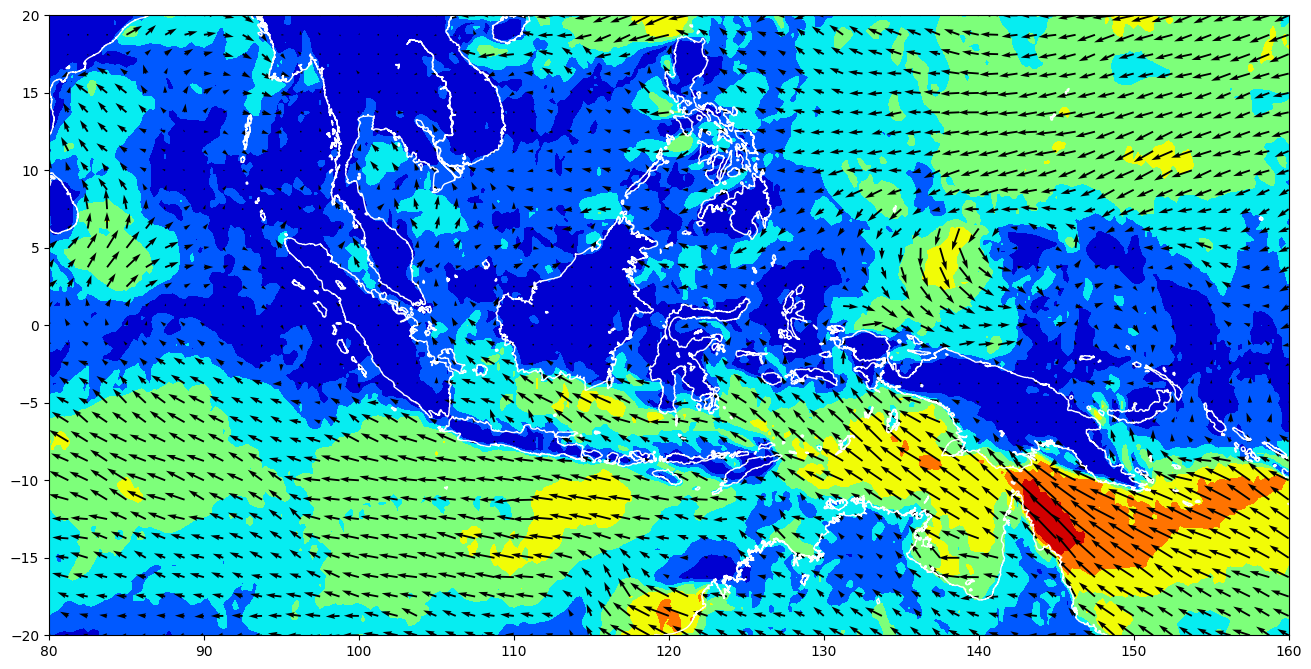

In [37]:
dpi = 100
zoom = 5

# plt.ioff()
fig = plt.figure(figsize=(len(lon)*zoom/dpi, len(lat)*zoom/dpi))
# fig, ax = plt.subplots(figsize=(len(lon)/dpi, len(lat)/dpi))

m = Basemap(projection='cyl', llcrnrlon=lon[0].values, llcrnrlat=lat[-1].values, urcrnrlon=lon[-1].values, urcrnrlat=lat[0].values, resolution='i', suppress_ticks=False)
m.drawcoastlines(color='white')

cf = plt.contourf(lon, lat, ws, cmap='jet')
skip = 5
q = m.quiver(lon[::skip], lat[::skip], u[::skip,::skip], v[::skip,::skip], scale_units='xy', scale=7, width=0.0015)

# plt.tight_layout(pad=0)

# fig.savefig(f"output/wind3.jpg", dpi=dpi)

plt.show()